In [ ]:
#hide
from mldsutils.mldsutils import *

# `mldsutils`: A machine-learning and data science utility package

## Dr. Tirthajyoti Sarkar, Fremont, CA

> This is a utility package for some of the most common data science (DS) and machine learning (ML) functions I use everyday.

## Install

`pip install mldsutils`

## How to use `mldsutils.mldsutils`

- Import the library
- Define a list of Scikit-learn estimators with your choice of hyperparameters
- Generate some synthetic data
- Run the `run_regressor` function to iterate through each of them and evaluate the given datatset

### Import

In [ ]:
from mldsutils.mldsutils import *
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification

### Classifiers and their names

In [ ]:
classifiers = [KNeighborsClassifier(3),
               SVC(kernel="linear", C=0.025),
               SVC(gamma=2, C=10),]

clf_names = ['k-Nearest Neighbors(3)',
             'Support Vector Machine with Linear Kernel',
            'Support Vector Machine with RBF Kernel']

### Some data

In [ ]:
X1, y1 = make_classification(n_features=20, n_samples=2000,n_redundant=0, n_informative=20,
                             n_clusters_per_class=1,class_sep=0.5)

### Run
Note, you will get back a Pandas DataFrame from this

In [ ]:
d1,d2 = run_classifiers(X1,y1,
                        clf_lst=classifiers,names = clf_names,
                        runtime=True,
                        metric='f1',verbose=True)

Finished 10 runs for k-Nearest Neighbors(3) algorithm
---------------------------------------------------------------------------
Finished 10 runs for Support Vector Machine with Linear Kernel algorithm
---------------------------------------------------------------------------
Finished 10 runs for Support Vector Machine with RBF Kernel algorithm
---------------------------------------------------------------------------


## Examining the result

### Checking the dataframe of F1-scores

In [ ]:
d1

,k-Nearest Neighbors(3),Support Vector Machine with Linear Kernel,Support Vector Machine with RBF Kernel
0,0.944724,0.861314,0.000000
1,0.968215,0.855746,0.641766
2,0.946292,0.863850,0.289474
3,0.967742,0.856481,0.000000
4,0.969849,0.865116,0.020202
5,0.966234,0.875912,0.000000
6,0.967581,0.868545,0.000000
7,0.957179,0.852381,0.000000
8,0.962791,0.871194,0.000000
9,0.948980,0.897959,0.010204


### Stats of the `d1` to compare algorithms

In [ ]:
d1.describe().T

,count,mean,std,min,25%,50%,75%,max
k-Nearest Neighbors(3),10.0,0.959959,0.009884,0.944724,0.951029,0.964512,0.967702,0.969849
Support Vector Machine with Linear Kernel,10.0,0.866850,0.013142,0.852381,0.857690,0.864483,0.870532,0.897959
Support Vector Machine with RBF Kernel,10.0,0.096165,0.211790,0.000000,0.000000,0.000000,0.017703,0.641766


### Checking the dataframe of fitting/training time

In [ ]:
d2

,k-Nearest Neighbors(3),Support Vector Machine with Linear Kernel,Support Vector Machine with RBF Kernel
0,0.979,43.942,124.595
1,0.000,45.477,137.699
2,0.000,45.893,107.373
3,0.981,49.376,141.589
4,0.000,44.429,148.940
5,0.976,43.940,147.467
6,0.977,42.083,134.906
7,0.974,46.962,139.639
8,0.000,42.484,130.852
9,0.976,61.050,113.273


In [ ]:
d2.describe().T

,count,mean,std,min,25%,50%,75%,max
k-Nearest Neighbors(3),10.0,0.5863,0.504610,0.000,0.00000,0.9750,0.97675,0.981
Support Vector Machine with Linear Kernel,10.0,46.5636,5.523546,42.083,43.94050,44.9530,46.69475,61.050
Support Vector Machine with RBF Kernel,10.0,132.6333,13.851391,107.373,126.15925,136.3025,141.10150,148.940


## Visualizing the results with the `plot_bars` function

Make sure to pass the correct titles of the plots. Otherwise, default strings will be plotted which may indicate wrong thing for your experiment.

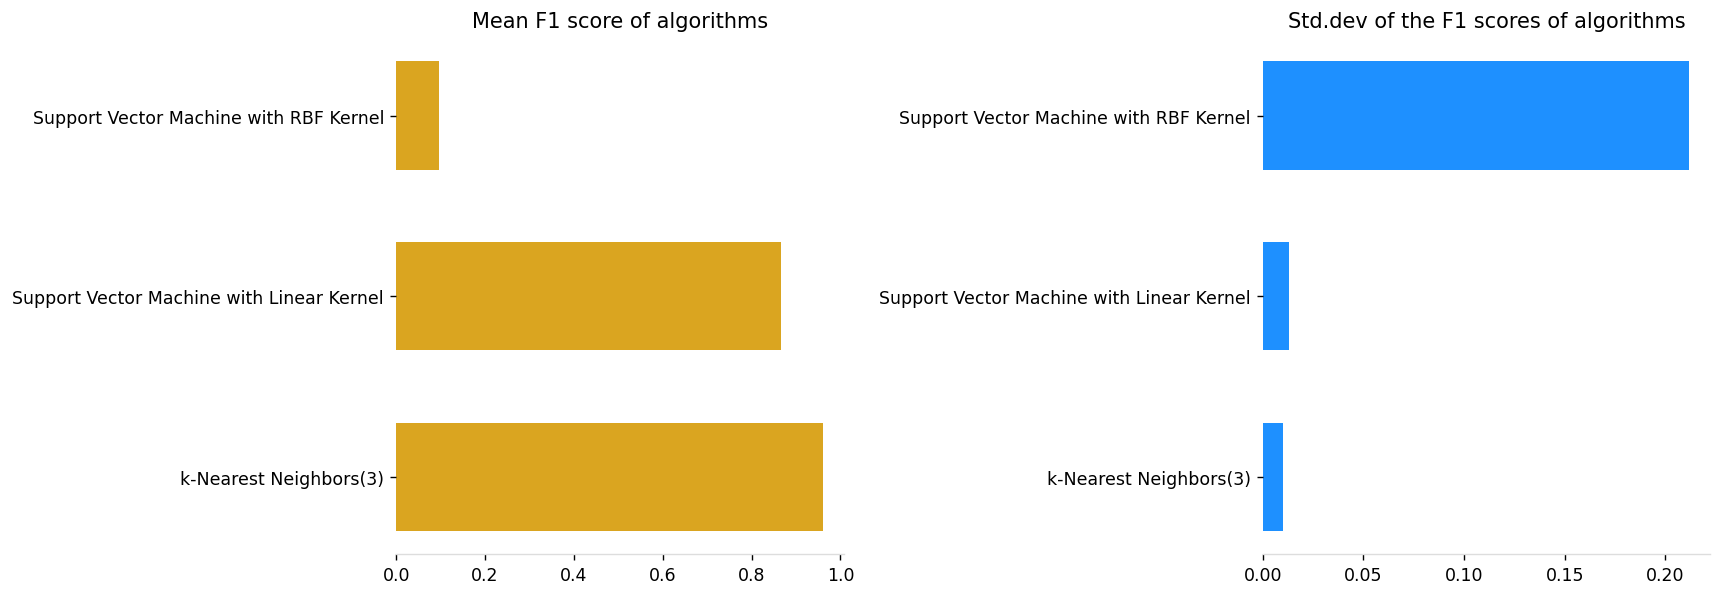

In [ ]:
plot_bars(d1,t1="Mean F1 score of algorithms",
              t2="Std.dev of the F1 scores of algorithms")

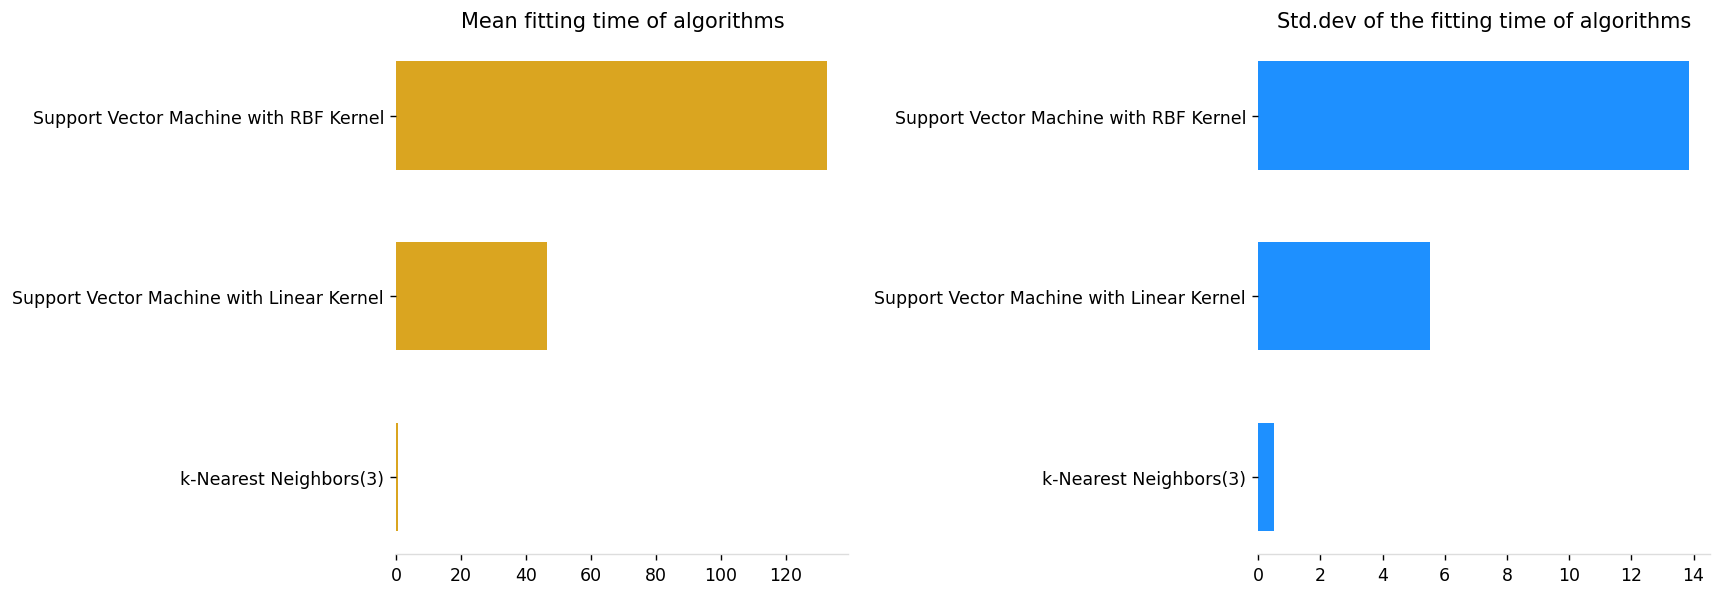

In [ ]:
plot_bars(d2,t1="Mean fitting time of algorithms",
              t2="Std.dev of the fitting time of algorithms")

## How to use `mldsutils.plots`

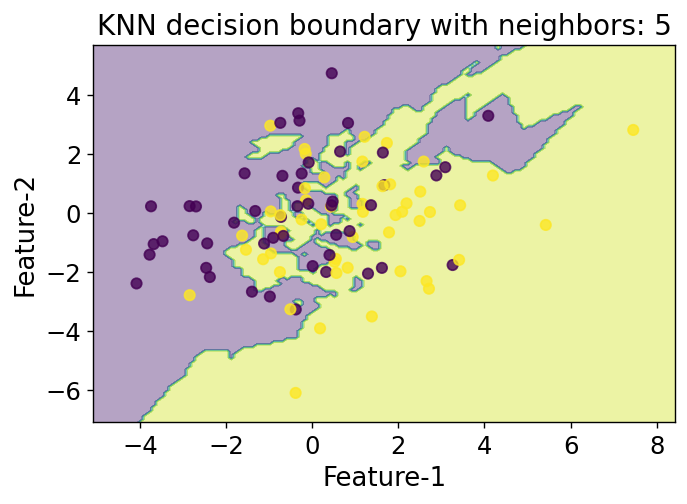

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from mldsutils.plots import *
        
X1, y1 = make_classification(n_features=10, n_samples=100,
                                     n_redundant=0, n_informative=10,
                                     n_clusters_per_class=1,class_sep=0.5)
plt.figure()
plt.title("KNN decision boundary with neighbors: 5",fontsize=16)
plot_decision_boundaries(X1,y1,KNeighborsClassifier,n_neighbors=5)
plt.show()